use model to predict result

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import auc,accuracy_score,recall_score,f1_score

## read data

In [2]:
Xtrain_new = pd.read_csv('Xtrain_new.csv',index_col=0)
Xtrain_new.head()

,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0.020,88.0,1.04000,288.0,2997.0,8.0
1,6.120,198.0,1.13743,401.0,13944.0,12.0
2,0.487,12364.0,1.75000,1792.0,590.0,23.0
3,0.060,101833.0,1.00000,32.0,63.0,21.0
4,0.560,114.0,1.00000,372.0,7207.0,7.0


In [3]:
Xtest_new = pd.read_csv('Xtest_new.csv',index_col=0)
Xtest_new.head()

,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0.087000,72926.0,1.330000,15,126.0,17
1,0.267000,1681.0,1.000000,61,2050.0,20
2,6.960000,179.0,1.000000,29,666.0,9
3,2.259314,2196.0,1.200000,309,3049.0,17
4,0.107000,2862.0,1.137582,47,1307.0,21


In [4]:
Ytrain = pd.read_csv('Ytrain.csv',index_col=0,header=0, dtype=float)
Ytrain.head()

,label
0.0,0.0
1.0,0.0
2.0,0.0
3.0,0.0
4.0,0.0


In [5]:
Ytest = pd.read_csv('Ytest.csv',index_col=0,header=0)
Ytest.head()

,label
0,0
1,0
2,1
3,0
4,0


In [6]:
Ytest.reset_index(drop=True)
ytest = Ytest.values.reshape(1,-1)[0]

In [7]:
ytrain = Ytrain.values.reshape(1,-1)[0]
ytrain

array([0., 0., 0., ..., 1., 0., 0.])

In [8]:
from sklearn.model_selection import cross_val_score
from time import time
import datetime

# hyperparameter tuning

## n_estimators

13:30:789224
0.7252676717120525 0


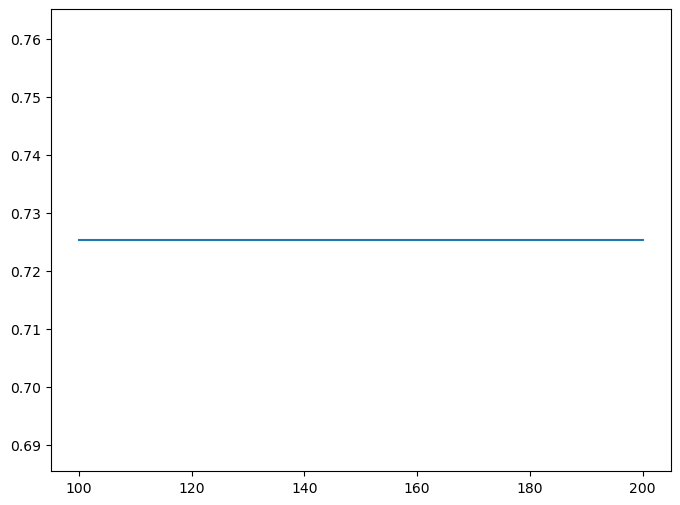

In [19]:
score = []
time0 = time()
for i in range(100,201,10):
    rfc = RFC(n_estimators= i ,max_depth=3 ,random_state=0, max_features= 'sqrt')
    score_one = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score.append(score_one)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print(max(score),np.argmax(score))
plt.figure(figsize=(8,6))
plt.plot(range(100,201,10),score)
plt.show()

## max_depth

18:50:329944
score： 0.8543898997079633 max_depth： 19


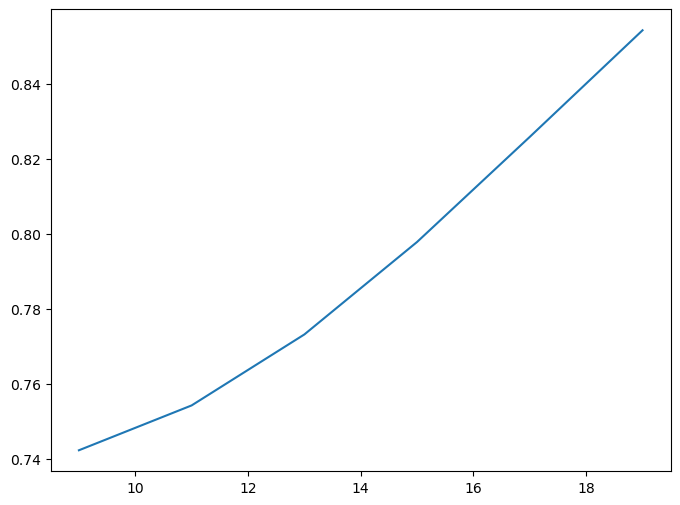

In [9]:
score = []
time0 = time()
for i in np.arange(9, 21, 2):
    rfc = RFC(n_estimators= 114
             ,max_depth= i
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print('score：',max(score),'max_depth：',np.arange(9, 21, 2)[np.argmax(score)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(9, 21, 2),score)
plt.show()

## min_samples_split

02:54:215121
score： 0.8486026810483015 min_sample_split： 2


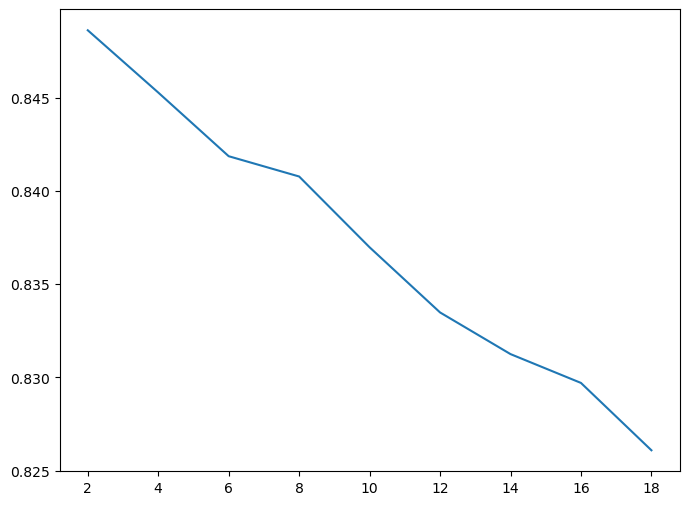

In [12]:
score_2 = []
time0 = time()
for i in np.arange(2, 20, 2):
    rfc = RFC(n_estimators= 10
             ,max_depth= 19
             ,min_samples_split= i
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score_2.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print('score：',max(score_2),'min_sample_split：',np.arange(2, 25, 2)[np.argmax(score_2)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 20, 2),score_2)
plt.show()

## min_samples_leaf

03:30:300890
score： 0.8486026810483015 min_samples_leaf： 1


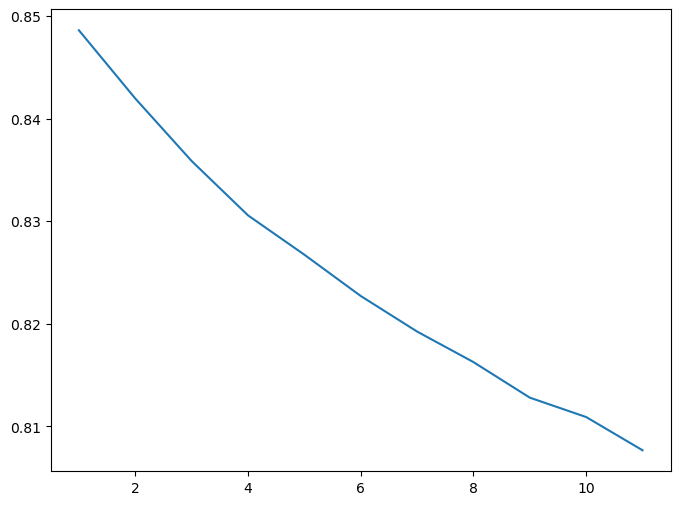

In [13]:
score_3 = []
time0 = time()
for i in np.arange(1, 12, 1):
    rfc = RFC(n_estimators= 10
             ,max_depth= 19
             ,min_samples_split= 2
             ,min_samples_leaf = i
             ,random_state=0)
    score_ = cross_val_score(rfc,Xtrain_new,ytrain,cv=5).mean()
    score_3.append(score_)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print('score：',max(score_3),'min_samples_leaf：',np.arange(1, 12, 1)[np.argmax(score_3)])
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 12, 1),score_3)
plt.show();

# determine parameter

In [14]:
clf = RFC(n_estimators=114, max_depth=19, min_samples_leaf=1, min_samples_split=2, random_state=0)
clf = clf.fit(Xtrain_new,ytrain)

In [15]:
clf.score(Xtrain_new,ytrain)

0.8845082729247289

In [16]:
clf.score(Xtest_new,ytest)

0.8610907123255904

In [17]:
 clf = RFC(n_estimators=180
         ,max_depth=20
         ,min_samples_leaf=1
         ,min_samples_split=2
         ,random_state=0
         )
clf = clf.fit(Xtrain_new,ytrain)

In [18]:
clf.score(Xtrain_new,ytrain)

0.9021038965879232

In [19]:
clf.score(Xtest_new,ytest)

0.8759855834267383

We can use grid search cv, but it's time spending

In [75]:
# from sklearn.model_selection import GridSearchCV 

In [ ]:
# time0 = time()
# rfc = RFC(n_estimators= 10
#           ,random_state=0)
# GS = GridSearchCV(rfc,param_grid,cv=5)
# GS.fit(Xtrain_new,ytrain)
# print('最佳参数：',GS.best_params_)
# print('最高得分：',GS.best_score_)
# print(datetime.datetime.fromtimestamp(time()-time0).strftime("%H:%M:%S"))

In [20]:
clf.feature_importances_

array([0.1826405 , 0.19243791, 0.14455728, 0.17323893, 0.19863258,
       0.10849279])

In [21]:
Xtest_new.columns

Index(['cityorders', 'lastpvgap', 'cr', 'sid', 'visitnum_oneyear', 'h'], dtype='object')

In [22]:
from sklearn.metrics import auc, roc_curve

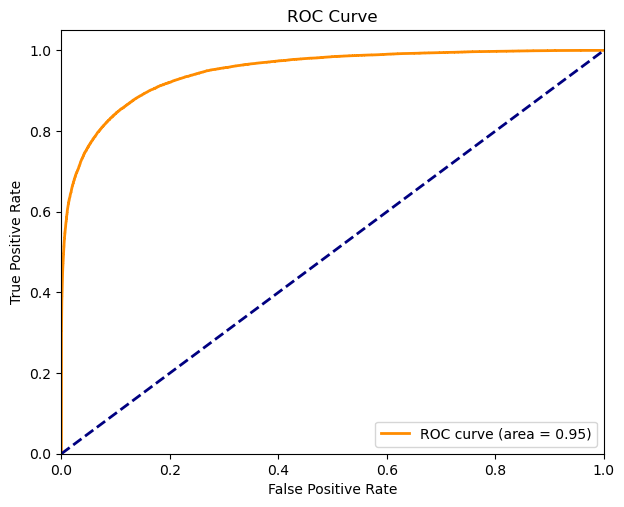

In [23]:
from sklearn.metrics import auc, roc_curve
model = RFC(n_estimators=180
         ,max_depth=20
         ,min_samples_leaf=1
         ,min_samples_split=2
         ,random_state=0
         )
# ROC
y_score = model.fit(Xtrain_new, ytrain).predict_proba(Xtest_new)  # 随机森林
fpr, tpr, thresholds = roc_curve(ytest, y_score[:, 1])
roc_auc = auc(fpr, tpr)
def drawRoc(roc_auc,fpr,tpr):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
drawRoc(roc_auc, fpr, tpr)